In [572]:
# cache_path = f'/net/kdinxidk03/opt/NFS/75y/data/OTMRC_PAPER/cached_dev_biolinkbert_384_test_otquad_fold_{4}'

# #################################################################

# features_and_dataset = torch.load(cache_path)
# features, dataset, examples = (
#                             features_and_dataset["features"],
#                             features_and_dataset["dataset"],
#                             features_and_dataset["examples"],)

# #################################################################
# context_fold = [ex.__dict__['context_text'] for ex in examples]
# question_fold = [ex.__dict__['question_text'] for ex in examples]
# answer_fold   = [ex.__dict__['answers'][0]['text'] for ex in examples]
# title_fold   = [ex.__dict__['title'] for ex in examples]
# qasid_fold    = [str(ex.__dict__['qas_id']) for ex in examples]

In [578]:
# np.unique(context_fold)

In [12]:
import torch
import string, re
import numpy as np
import collections
import pandas as pd
import json

In [2]:
def normalize_answer(s):
    """Lower text and remove punctuation, articles and extra whitespace."""

    def remove_articles(text):
        regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
        return re.sub(regex, " ", text)

    def white_space_fix(text):
        return " ".join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s))))


def get_tokens(s):
    if not s:
        return []
    return normalize_answer(s).split()

def get_clean_ans(s):
    if not s:
        return []
    return normalize_answer(s)


def compute_exact(a_gold, a_pred):
    return int(normalize_answer(a_gold) == normalize_answer(a_pred))


def compute_f1(a_gold, a_pred):
    gold_toks = get_tokens(a_gold)
    pred_toks = get_tokens(a_pred)
    common = collections.Counter(gold_toks) & collections.Counter(pred_toks)
    num_same = sum(common.values())
    if len(gold_toks) == 0 or len(pred_toks) == 0:
        # If either is no-answer, then F1 is 1 if they agree, 0 otherwise
        return int(gold_toks == pred_toks)
    if num_same == 0:
        return 0
    precision = 1.0 * num_same / len(pred_toks)
    recall = 1.0 * num_same / len(gold_toks)
    f1 = (2 * precision * recall) / (precision + recall)
    
#     print(recall)
    
    return f1


def compute_recall(a_gold, a_pred):
    gold_toks = get_tokens(a_gold)
    pred_toks = get_tokens(a_pred)
    common = collections.Counter(gold_toks) & collections.Counter(pred_toks)
    num_same = sum(common.values())
    if len(gold_toks) == 0 or len(pred_toks) == 0:
        # If either is no-answer, then F1 is 1 if they agree, 0 otherwise
        return int(gold_toks == pred_toks)
    if num_same == 0:
        return 0
    recall = 1.0 * num_same / len(gold_toks)
    
    return recall


def get_raw_scores(examples, preds):
    """
    Computes the exact and f1 scores from the examples and the model predictions
    """
    exact_scores = {}
    f1_scores = {}
    recall_scores = {}

    for example in examples:
        qas_id = example.qas_id
        gold_answers = [answer["text"] 
                        for answer in example.answers 
                        if normalize_answer(answer["text"])]

        if not gold_answers:
            # For unanswerable questions, only correct answer is empty string
            gold_answers = [""]

        if str(qas_id) not in preds:
            print(f"Missing prediction for {qas_id}")
            continue

        qas_id = str(qas_id)
        prediction = preds[qas_id]
        exact_scores[qas_id] = max(compute_exact(a, prediction)
                                   for a in gold_answers)
        f1_scores[qas_id] = max(compute_f1(a, prediction)
                                for a in gold_answers)
        recall_scores[qas_id] = max(compute_recall(a, prediction)
                                for a in gold_answers)

    return exact_scores, f1_scores, recall_scores


In [3]:
# cache_path = '/net/kdinxidk03/opt/NFS/75y/data/OTMRC_PAPER/cached_dev_biolinkbert_384_test_otquad'

# features_and_dataset = torch.load(cache_path)
# features, dataset, examples = (
#                               features_and_dataset["features"],
#                               features_and_dataset["dataset"],
#                               features_and_dataset["examples"],)

# Get the result DF

In [4]:
!ls /net/kdinxidk03/opt/NFS/75y/data/qa/output/biolinkbert-otquad-fold1/

cached_dev_biolinkbert_384_test_otquad_fold_1
config.json
model.pt
nbest_predictions_otquad_fold_1.json
predictions_otquad_fold_1.json
pytorch_model.bin
results_biolinkbert_384_otquad_fold_1.csv
special_tokens_map.json
tokenizer_config.json
training_args.bin
vocab.txt


In [5]:
# path = '/net/kdinxidk03/opt/NFS/75y/data/qa/output/biolinkbert-otquad-fold1/'
# json.load(open(path+'predictions_otquad_fold_1.json'))

In [6]:
# ## unsup
# /net/kdinxidk03/opt/NFS/75y/data/qa/output/biolinkbert-squad/nbest_predictions_otquad.json
# /net/kdinxidk03/opt/NFS/75y/data/qa/output/biolinkbert-squad/nbest_predictions_squad.json

# ## sup
# /net/kdinxidk03/opt/NFS/75y/data/qa/output/biolinkbert-squadANDotquad-fold2/nbest_predictions_otquad_fold_{numFold}.json

In [7]:
last_folder_name = [
                    'final-aug13',
                    'final-aug13',
                    'final',
                    'final-aug13',
                    'final-aug13',
                   ]


In [179]:
def get_resultDF(numFold):
#   cache_path = f'/net/kdinxidk03/opt/NFS/75y/data/OTMRC_PAPER/cached_dev_biolinkbert_384_test_squad'
  cache_path = f'/net/kdinxidk03/opt/NFS/75y/data/OTMRC_PAPER/cached_dev_biolinkbert_384_test_otquad_fold_{numFold}'
#   result_path = f'/net/kdinxidk03/opt/NFS/75y/data/qa/output/biolinkbert-otquad-fold{numFold}/predictions_otquad_fold_{numFold}.json'
#   result_path = f'/net/kdinxidk03/opt/NFS/75y/data/qa/output/biolinkbert-squadANDotquad-fold{numFold}/predictions_otquad_fold_{numFold}.json'
#   result_path = f'/net/kdinxidk03/opt/NFS/75y/data/qa/output/biolinkbert-squad-otquad-fold{numFold}-sequential/predictions_otquad_fold_{numFold}.json'
#   result_path = f'/net/kdinxidk03/opt/NFS/75y/data/qa/output/biolinkbert-squad/predictions_otquad.json'
  result_path = f'/net/kdinxidk03/opt/NFS/75y/data/OTMRC_PAPER/supervised_fold{numFold}/{last_folder_name[numFold-1]}/predictions_otquad_fold_{numFold}.json'
    
  #####################################################################################

  features_and_dataset = torch.load(cache_path)
  features, dataset, examples = (
                                features_and_dataset["features"],
                                features_and_dataset["dataset"],
                                features_and_dataset["examples"],)
  predictions = json.load(open(result_path))
  em, f1, recall = get_raw_scores(examples, predictions)

  #################################################################
  context_fold = [ex.__dict__['context_text'] for ex in examples]
  question_fold = [ex.__dict__['question_text'] for ex in examples]
  answer_fold   = [ex.__dict__['answers'][0]['text'] for ex in examples]
  title_fold   = [ex.__dict__['title'] for ex in examples]
  qasid_fold    = [str(ex.__dict__['qas_id']) for ex in examples]

  df_res             = pd.DataFrame()
  df_res['Context']  = context_fold
  df_res['Question'] = question_fold
  df_res['Answer']   = answer_fold
  df_res['Predicted_Answer'] = list(predictions.values())
  df_res['title_old']    = title_fold
  df_res['id']       = qasid_fold
  df_res['Recall']   = df_res['id'].map(recall)
  df_res['EM']       = df_res['id'].map(em)
  df_res['F1']       = df_res['id'].map(f1)

  print(df_res['EM'].mean())
  print(df_res['F1'].mean())

  return df_res

In [182]:
# df = get_resultDF(0)

# gfg_data = df['EM'].values.tolist()

# n=len(gfg_data)

# x = sum([1 for x in gfg_data if x==1])

# p1,p2 = binomial_ci(x,n)

# print(f'{round(df.EM.mean()*100, 2)}')
# print(f'{round(p1*100,2)}—{round(p2*100,2)}')

In [183]:
# from scipy.stats import t

# gfg_data = df['F1'].values.tolist()

# x = np.array(gfg_data)
# m = x.mean() 
# s = x.std() 
# dof = len(x)-1 
# confidence = 0.95

# t_crit = np.abs(t.ppf((1-confidence)/2,dof))
# p1 = m-s*t_crit/np.sqrt(len(x))
# p2 = m+s*t_crit/np.sqrt(len(x))

# print(f'{np.mean(gfg_data)}')
# print(f'{p1}—{p2}')

In [184]:
df_res_all = pd.DataFrame()
df_list = []
for i in range(1,6):
  print(f'------ FOLD-{i} ------')
  res = get_resultDF(i)
  df_res_all = df_res_all.append(res)
  df_list.append(res)

------ FOLD-1 ------
0.8117647058823529
0.9333374281151439
------ FOLD-2 ------
0.7658227848101266
0.905679255448131
------ FOLD-3 ------
0.7925311203319502
0.9203598687791298
------ FOLD-4 ------
0.8070175438596491
0.92176935710682
------ FOLD-5 ------
0.7766233766233767
0.9071368895377306


In [185]:
# df_res_all

In [186]:
def plot_binned_score(df, column_name, bins):
    import seaborn as sns
    import matplotlib.pyplot as plt
    col   = ['Count', column_name]
    color = sns.color_palette('pastel')

    df_binned_sum = df.groupby(pd.cut(df[column_name],bins=bins))[col].sum()
    
    df_binned_sum.dropna(inplace=True)
    df_binned_sum = df_binned_sum[df_binned_sum['Count']!=0]
    df_binned_sum['Count'] = df_binned_sum['Count']/1097
    df_binned_sum['Count'] = df_binned_sum['Count']*100

    fig, ax = plt.subplots(figsize=(8,5))
    
#     plt.plot(range(df_binned.shape[0]),
# #                df_binned[column_name].values,
#                  df_binned['EM'].values,
#                  'o-',
#                  color = color[0],
#                  label = 'EM score')

#     plt.plot(range(df_binned.shape[0]),
# #                  df_binned[column_name].values,
#                  df_binned['F1'].values,
#                  'o-',
#                  color = color[1],
#                  label = 'F1 score')

    xticks = ['0',
              '0<p≤10',
              '10<p≤20',
              '20<p≤30',
              '30<p≤40',
              '40<p≤50',
              '50<p≤60',
              '60<p≤70',
              '70<p≤80',
              '80<p≤90',
              '90<p≤99',
              '99<p≤100'
             ]
    
    df_binned_sum['bin_num'] = range(df_binned_sum.shape[0])

    sns.barplot(data = df_binned_sum,
                x = 'bin_num',
                y = 'Count',
                color = sns.color_palette('pastel')[0],
#                 alpha = ,
#                  label = 'Recall score'
               )
    
#     plt.legend(loc="upper right", prop={'size': 14})
    
    plt.xticks(range(df_binned_sum.shape[0]),
               xticks,
               fontsize=13,
               rotation = 30
              )

    plt.yticks(fontsize=13,
#                rotation = 0
              )

    plt.xlabel(f'Percentage of overlapping words between predicted answer\nand ground truth answer (excludes the Exact Matches)', fontsize=15)
    plt.ylabel(f'Percentage of test samples', fontsize=15)
    ax.tick_params(direction='out',
                   bottom=True, left=True,
                   length=5, width=1)
    
#     plt.show()

    
#     a = plt.axes([.2, .2, .4, .2], facecolor='white')
#     plt.bar(range(df_binned.shape[0]),
# #             df_binned[column_name].values,
#             df_binned_sum['Count'].values, 
# #             color = 'b',
#             alpha = .4,
#             width = 1,
# #             label = 'Sample Count'
#            )
    
#     plt.xticks(range(df_binned.shape[0]),
#                list(df_binned.index),
#                fontsize=8,
#                rotation = 0
#               )
    
#     plt.yticks(fontsize=8)
    
# #     plt.legend(loc="best",prop={'size': 10})

#     plt.xlabel(f'Bins', fontsize=10)
#     plt.ylabel('Sample count', fontsize=10)
    
#     plt.xticks(df_binned_sum[column_name].values, list(df_binned_sum.index), rotation = 60)
#     plt.yticks(rotation = 0)

#     ax.tick_params(direction='out', length=20, width=2, colors='k',
#                grid_color='k', grid_alpha=1)

#     a.tick_params(direction='out',
#                   bottom=True, left=True,
#                   length=3, width=1)

    
    print(df_binned_sum['Count'].values)
    
    return df_binned_sum
  


In [187]:
trial_df = df_res_all

trial_df = trial_df[trial_df['EM']!=1].reset_index(drop=True)

trial_df['Recall'] = trial_df['Recall']*100

trial_df['Recall'] = trial_df['Recall'].apply(int)

# no_match = trial_df[trial_df['Recall']==0]

# match_1_to_10_percent = trial_df[(trial_df['Recall']>=1) & (trial_df['Recall']<=10)]

# match_100_percent = trial_df[trial_df['Recall']==100] # more words were captured in the answer than necessary


In [188]:
trial_df['Count'] = [1]*len(trial_df)

[1.36736554 1.45852325 1.36736554 1.09389243 1.00273473 2.09662716
 0.82041933 1.00273473 1.18505014 1.82315406 1.45852325 6.5633546 ]


,Count,Recall,bin_num
Recall,,,
"(-0.1, 0.0]",1.367366,0,0
"(0.0, 10.0]",1.458523,100,1
"(10.0, 20.0]",1.367366,230,2
"(20.0, 30.0]",1.093892,306,3
"(30.0, 40.0]",1.002735,412,4
"(40.0, 50.0]",2.096627,1070,5
"(50.0, 60.0]",0.820419,521,6
"(60.0, 70.0]",1.002735,714,7
"(70.0, 80.0]",1.185050,984,8


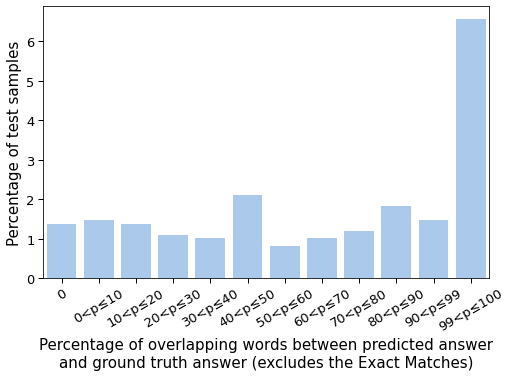

In [189]:
bins = [
    -.1,0,10,20,30,40,50,60,70,80,90,99,100
]


plot_binned_score(trial_df, 'Recall', bins)

In [560]:
# (no_match.shape[0]/len(df_res_all))*100, (match_100_percent.shape[0]/len(df_res_all))*100

In [561]:
# trial_df['Recall'].describe()

In [562]:
# df_res_all['Recall'].mean()

In [563]:
# (trial_df[(trial_df['Recall']>=0) & (trial_df['Recall']<=.1)].reset_index(drop=True).shape[0]/df_list[0].shape[0])*100

In [564]:
# perc0_overlap = (trial_df[trial_df['Recall']==0].reset_index(drop=True).shape[0]/df_list[0].shape[0])*100

In [565]:
# perc100_overlap = (trial_df[trial_df['Recall']==1].reset_index(drop=True).shape[0]/df_list[0].shape[0])*100

# perc0_overlap, perc100_overlap

In [566]:
# perc80_to_100_overlap = (trial_df[(trial_df['Recall']>=.7) & (trial_df['Recall']<1)].reset_index(drop=True).shape[0]/df_list[0].shape[0])*100

In [567]:
# perc0_to_100_overlap = (trial_df[(trial_df['Recall']>=.7) & (trial_df['Recall']<1)].reset_index(drop=True).shape[0]/df_list[0].shape[0])*100

# perc80_to_100_overlap

In [568]:
# trial_df[trial_df['Recall']!=1].reset_index(drop=True)

In [109]:
# k = 1

In [110]:
# con_toks = get_tokens(trial_df.iloc[k]['Context'])

In [111]:
# gt_toks = get_tokens(trial_df.iloc[k]['Answer'])

In [112]:
# pred_toks = get_tokens(trial_df.iloc[k]['Predicted_Answer'])

In [487]:
#     if ctext[idx-20:idx] + get_clean_ans(trial_df.iloc[k]['Answer']) + ctext[idx+len(get_clean_ans(trial_df.iloc[k]['Answer'])):idx+len(get_clean_ans(trial_df.iloc[k]['Answer']))+20] in get_clean_ans(trial_df.iloc[k]['Predicted_Answer']):

# df_list[0][df_list[0]['F1']==0].reset_index(drop=True)

In [486]:
# ctext = get_clean_ans(trial_df.iloc[k]['Context'])
# atext = get_clean_ans(trial_df.iloc[k]['Answer'])
# ptext = get_clean_ans(trial_df.iloc[k]['Predicted_Answer'])
# idx   = ctext.find(atext)

# ct = 0
# for k in range(len(trial_df)):
#     if atext in ptext:
#         ct+=1
#     elif ptext in atext:
#         ct+=1
#     else:
#         print()
#         print(trial_df.iloc[k]['Answer'])
#         print()
#         print(trial_df.iloc[k]['Predicted_Answer'])


In [685]:
import numpy as np
import scipy.stats as st
  
# define sample data
def binomial_ci(x, n, alpha=0.05):
    #x is number of successes, n is number of trials
    from scipy import stats
    if x==0:
        c1 = 0
    else:
        c1 = stats.beta.interval(1-alpha, x,n-x+1)[0]
    if x==n:
        c2=1
    else:
        c2 = stats.beta.interval(1-alpha, x+1,n-x)[1]
    return c1, c2


for i in range(5):
    
    gfg_data = df_list[i]['F1'].values.tolist()

    x = np.array(gfg_data)
    m = x.mean() 
    s = x.std() 
    dof = len(x)-1 
    confidence = 0.95

    t_crit = np.abs(t.ppf((1-confidence)/2,dof))
    p1 = m-s*t_crit/np.sqrt(len(x))
    p2 = m+s*t_crit/np.sqrt(len(x))

#     print(f'{np.mean(gfg_data)}')
#     print(f'{p1}—{p2}')
#     print(p1)
    print(p2)


#     gfg_data = df_list[i]['EM'].values.tolist()

# #     # create 95% confidence interval
# #     print(i, st.t.interval(alpha=0.95, df=len(gfg_data)-1,
# #                   loc=np.mean(gfg_data),
# #                   scale=st.sem(gfg_data)))

#     n=len(gfg_data)

#     x = sum([1 for x in gfg_data if x==1])

#     p1,p2 = binomial_ci(x,n)

#     import math
    
#     print(f'{round(df_list[i].EM.mean()*100, 2)}')
# #     print(f'{round(p1*100,2)}—{round(p2*100,2)}')

    
gfg_data = df_res_all['F1'].values.tolist()

x = np.array(gfg_data)
m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
p1 = m-s*t_crit/np.sqrt(len(x))
p2 = m+s*t_crit/np.sqrt(len(x))

# print(f'{np.mean(gfg_data)}')
# print(f'{p1}—{p2}')




# n=len(gfg_data)

# x = sum([1 for x in gfg_data if x==1])

# p1,p2 = binomial_ci(x,n)

# # print(p1, p2)

# # print(st.t.interval(alpha=0.95, df=len(gfg_data)-1,
# #       loc=np.mean(gfg_data),
# #       scale=st.sem(gfg_data)))

# print(f'{round(df_res_all.EM.mean()*100, 2)} CI:[{round(p1*100,2)}—{round(p2*100,2)}]')

0.9723061190021547
0.9408474164646186
0.9480330111897949
0.9501564564605666
0.9299878327441942


(1097, 9)

In [580]:
from scipy.stats import t

x = np.array(gfg_data)
m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
(m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))) 


(0.751990690664727, 0.801336565488418)

In [466]:
sum([1 for x in gfg_data if x==1])/1097

0.7766636280765725

In [464]:
df_list[0]['EM'].mean()

import scipy
from scipy.stats import binomtest
result = scipy.stats.binomtest(sum([1 for x in gfg_data if x==1]), n=len(gfg_data), p=0.1, )
result.proportion_ci()


# A car manufacturer claims that no more than 10% of their cars are unsafe. 
# 15 cars are inspected for safety, 3 were found to be unsafe. Test the manufacturer’s claim:

# result = binomtest(3, n=15, p=0.1, alternative='greater')
# result.pvalue



ConfidenceInterval(low=0.7508374180211181, high=0.8009964653597729)

0.7508374180211184 0.8009964653599588


In [14]:
print(df_res_all['EM'].mean())
print(df_res_all['F1'].mean())

# 72.4704	86.1652

0.7876025524156791
0.9149032342923822


In [15]:
# 85
# 158
# 241
# 228
# 385


In [16]:
print(df_res_all.shape)
df_res_all.head(2)

(1097, 6)


,Question,Answer,title_old,id,EM,F1
0,What is recommended when considering initiatin...,assessing suicide risk,Discussion of Recommendations: Risk Mitigation...,0,1,1.0
1,Which strategies may be helpful for those at h...,"checking the PDMP, performing a UDT, placemen...",Discussion of Recommendations: Opioid Therapy ...,1,1,1.0


# Analysis

In [17]:
df_res_all = df_res_all.reset_index(drop=True)

In [18]:
print(df_res_all.shape)
df_res_all.head(2)

(1097, 6)


,Question,Answer,title_old,id,EM,F1
0,What is recommended when considering initiatin...,assessing suicide risk,Discussion of Recommendations: Risk Mitigation...,0,1,1.0
1,Which strategies may be helpful for those at h...,"checking the PDMP, performing a UDT, placemen...",Discussion of Recommendations: Opioid Therapy ...,1,1,1.0


In [553]:
def get_qtype_freq(df):
  q_list = df['question'].values.tolist()
  q_type = ['what', 'when', 'where', 'who', 'whom', 
            'which', 'why', 'how'] #, 'name', 'whose', 
  
  q_freq = {}
  for ques in q_list:
    q_tokens = ques.lower().split()
    for typ in q_type:
      if typ in q_tokens[0]:
        q_freq.setdefault(typ, []).append(ques)

  freq_qtype = [len(x) for x in list(q_freq.values())]
  print(freq_qtype, sum(freq_qtype))
  
  df_sorted = pd.DataFrame()
  
  df_sorted['QTYPE'] = list(q_freq.keys())
  df_sorted['QFREQ'] = freq_qtype
  df_sorted['n'] = freq_qtype
  df_sorted = df_sorted.sort_values("QFREQ", ascending=False)

  print(df_sorted.shape)
  
  return df_sorted


def find_question_type(df):
  q_list = df['question'].values.tolist()
  q_type = ['what', 'when', 'where', 'who', 'whom', 
            'which', 'why', 'how'] #, 'name', 'whose', 
  k=0
  qtyp_ls = []
  ques_ls = []
  for ques in q_list:
    k+=1
    q_tokens = ques.lower().split()
    for typ in q_type:
      if typ in q_tokens[0]:
        qtyp_ls.append(typ)
        ques_ls.append(ques)
      elif typ not in q_tokens[0]:
        qtyp_ls.append('Others')
        ques_ls.append(ques)
        
  assert len(qtyp_ls) == len(ques_ls)
  print(len(qtyp_ls), k)
  
  return qtyp_ls, ques_ls


def get_qtype(ques):
  q_type = ['what', 'when', 'where', 'who', 'whom', 
            'which', 'why', 'how', 'name'] #, 'name', 'whose', 
  
  q_tokens = ques.lower().split()
  for typ in q_type:
    if typ in q_tokens[0]:
      return typ[0].upper()+typ[1:]
  return 'Others'


In [554]:
new_title = {'Discussion of Recommendations: Risk Mitigation: Recommendation':'Recommendations',
 'Discussion of Recommendations: Risk Mitigation: Discussion: Written Informed Consent and Opioid Treatment Agreements \n':'Recommendations',
 'Discussion of Recommendations: Opioid Therapy for Acute Pain: Discussion':'Recommendations',
 'Discussion of Recommendations: Risk Mitigation: Discussion: Prescribing of Naloxone Rescue and Accompanying Education':'Recommendations',
 'Discussion of Recommendations: Opioid Therapy for Acute Pain: Recommendation':'Recommendations',
 'Recommendations':'Recommendations',
 'About this Clinical Practice Guideline: Shared Decision Making': 'Specifications',
 'Discussion of Recommendations: Initiation and Continuation of Opioids: Recommendation \n':'Recommendations',
 'Introduction' : 'Introduction',
 'Discussion of Recommendations: Risk Mitigation: Discussion: Other Risk Mitigation Strategies':'Recommendations',
 'Paradigm Shift in Pain and Its Treatment':'Background',
 'Discussion of Recommendations: Type, Dose, Duration, Follow-up, and Taper of Opioids: Recommendations':'Recommendations',
 'Epidemiology and Impact: General Population':'Background',
 'Discussion of Recommendations: Risk Mitigation: Discussion':'Recommendations',
 'About this Clinical Practice Guideline: Methods': 'Specifications',
 'Opioid Epidemic':'Background',
 'Discussion of Recommendations: Initiation and Continuation of Opioids: Discussion \n':'Recommendations',
 'Module C: Tapering or Discontinuation of Opioid Therapy': 'Algorithm',
 'Discussion of Recommendations: Type, Dose, Duration, Follow-up, and Taper of Opioids: Discussion':'Recommendations',
 'Discussion of Recommendations: Risk Mitigation: Discussion: State Prescription Drug Monitoring Programs':'Recommendations',
 'Discussion of Recommendations: Initiation and Continuation of Opioids: Recommendations \n':'Recommendations',
 'How to Use This Clinical Practice Guideline': 'Introduction',
 'Chronic Pain and Co-occurring Conditions ':'Background',
 'Discussion of Recommendations: Risk Mitigation: Discussion: Patients at High Risk for Opioid Use Disorder':'Recommendations',
 'Module A: Determination of Appropriateness for Opioid Therapy': 'Algorithm',
 'Risk Factors for Adverse Outcomes of Opioid Therapy ':'Background',
 'Taxonomy':'Background',
 'About this Clinical Practice Guideline': 'Specifications',
 'About this Clinical Practice Guideline: Patient-centered Care': 'Specifications',
 'Pain Management Opioid Taper Decision Tool': 'Specifications',
 'Prioritizing Safe Opioid Prescribing Practices and Use ':'Background',
 'Discussion of Recommendations: Initiation and Continuation of Opioids: Discussion':'Recommendations',
 'Significant Risk Factors':'Background',
 'About this Clinical Practice Guideline: Clinical Decision Support Tools': 'Specifications',
 'Qualifying Statements':'Introduction',
 'Module D: Patients Currently on Opioid Therapy': 'Algorithm',
 'Mental health disorders':'Background',
 'Discussion of Recommendations: Risk Mitigation: Discussion: Urine Drug Testing and Confirmatory Testing':'Recommendations',
 'Discussion of Recommendations: Initiation and Continuation of Opioids: Recommendation':'Recommendations',
 'About this Clinical Practice Guideline: Scope of this Clinical Practice Guideline': 'Specifications',
 'Algorithm': 'Algorithm',
 'Module B: Treatment with Opioid Therapy': 'Algorithm',
 'About this Clinical Practice Guideline: Highlighted Features of this Clinical Practice Guideline': 'Specifications',
 'Epidemiology and Impact: VA/DoD Population ': 'Background'}


In [555]:
df_res_all['Title'] = df_res_all['title_old'].map(new_title)
df_res_all['Title'].value_counts().sum()

1097

In [556]:
df_res_all['qtype'] = df_res_all['Question'].apply(get_qtype)

In [557]:
df = df_res_all
df.qtype.value_counts()

What      578
Others    174
When       92
How        76
Which      70
Who        61
Why        28
Where      14
Name        4
Name: qtype, dtype: int64

In [558]:
question_others = df[df['qtype']=='Others']['Question'].values.tolist()
question_define = df[df['qtype']!='Others']['Question'].values.tolist()

ids_others      = df[df['qtype']=='Others']['id'].values.tolist()
ids_define      = df[df['qtype']!='Others']['id'].values.tolist()

qtyp_define     = df[df['qtype']!='Others']['qtype'].values.tolist()

answer_others = df[df['qtype']=='Others']['Answer'].values.tolist()
answer_define = df[df['qtype']!='Others']['Answer'].values.tolist()

title_others = df[df['qtype']=='Others']['Title'].values.tolist()
title_define = df[df['qtype']!='Others']['Title'].values.tolist()

em_others = df[df['qtype']=='Others']['EM'].values.tolist()
em_define = df[df['qtype']!='Others']['EM'].values.tolist()

f1_others = df[df['qtype']=='Others']['F1'].values.tolist()
f1_define = df[df['qtype']!='Others']['F1'].values.tolist()


remainder_ques  = []
remainder_qtyp  = []
remainder_id    = []
remainder_ans   = []
remainder_title = []
remainder_em    = []
remainder_f1    = []

for i, x in enumerate(question_others):
  if 'what' in x.lower():
    if x not in question_define:
      remainder_ques.append(x)
      remainder_qtyp.append('What')
      remainder_id.append(ids_others[i])
      remainder_ans.append(answer_others[i])
      remainder_title.append(title_others[i])
      remainder_em.append(em_others[i])
      remainder_f1.append(f1_others[i])

In [559]:
print(len(remainder_ques),
      len(remainder_qtyp),
      len(remainder_id),
      len(remainder_ans),
      len(remainder_title),
      len(remainder_em),
      len(remainder_f1),
     )

84 84 84 84 84 84 84


In [560]:
for QT in ['what', 'when', 'where', 'who', 'whom', 
            'which', 'why', 'how',
           'is there', 'are there', 'is ther', 'was there', 'in there',
           'define', 'mention', 'should']:
  for i, x in enumerate(question_others):
    if QT in x.lower():
      if x not in remainder_ques:
        if x not in question_define:
          remainder_ques.append(x)
          remainder_qtyp.append(QT[0].upper()+QT[1:])
          remainder_id.append(ids_others[i])
          remainder_ans.append(answer_others[i])
          remainder_title.append(title_others[i])  
          remainder_em.append(em_others[i]) 
          remainder_f1.append(f1_others[i])         

In [561]:
final_ques_ls = []
final_qtyp_ls = []
final_ids_ls  = []
final_ans_ls = []
final_title_ls  = []
final_em_ls  = []
final_f1_ls  = []

final_ques_ls.extend(question_define)
final_ques_ls.extend(remainder_ques)

final_qtyp_ls.extend(qtyp_define)
final_qtyp_ls.extend(remainder_qtyp)

final_ids_ls.extend(ids_define)
final_ids_ls.extend(remainder_id)

final_ans_ls.extend(answer_define)
final_ans_ls.extend(remainder_ans)

final_title_ls.extend(title_define)
final_title_ls.extend(remainder_title)

final_em_ls.extend(em_define)
final_em_ls.extend(remainder_em)

final_f1_ls.extend(f1_define)
final_f1_ls.extend(remainder_f1)

In [562]:
print(len(final_ques_ls),
      len(question_define),
      len(final_qtyp_ls),
      len(final_ids_ls),
      len(final_ans_ls),
      len(final_title_ls),  
      len(final_em_ls),  
      len(final_f1_ls),      
     )

1097 923 1097 1097 1097 1097 1097 1097


In [563]:
# df

In [564]:
ques_ls = df['Question'].values.tolist()
qid_ls = df['id'].values.tolist()
ans_ls = df['Answer'].values.tolist()
title_ls = df['Title'].values.tolist()

em_ls = df['EM'].values.tolist()
f1_ls = df['F1'].values.tolist()

In [565]:
for i, x in enumerate(ques_ls):
  if x not in final_ques_ls:
    final_ques_ls.append(x)
    final_qtyp_ls.append('Others')
    final_ids_ls.append(qid_ls[i])
    final_ans_ls.append(ans_ls[i])
    final_title_ls.append(title_ls[i])
    final_em_ls.append(em_ls[i])
    final_f1_ls.append(f1_ls[i])

In [566]:
df_final = pd.DataFrame()
df_final['Question'] = final_ques_ls
df_final['Question Type'] = final_qtyp_ls
df_final['QID'] = final_ids_ls
df_final['Answer'] = final_ans_ls
df_final['Title'] = final_title_ls
df_final['EM'] = final_em_ls
df_final['F1'] = final_f1_ls

In [567]:
df_final['Question Type'].value_counts().sum()

1097

In [568]:
df_final.loc[df_final['Question Type'] == 'Name', 'Question Type'] = 'What'
df_final.loc[df_final['Question Type'] == 'Define', 'Question Type'] = 'What'
df_final.loc[df_final['Question Type'] == 'Mention', 'Question Type'] = 'What'
df_final.loc[df_final['Question Type'] == 'Should', 'Question Type'] = 'Is there'
df_final.loc[df_final['Question Type'] == 'Are there', 'Question Type'] = 'Is there'
df_final.loc[df_final['Question Type'] == 'Is ther', 'Question Type'] = 'Is there'
df_final.loc[df_final['Question Type'] == 'Was there', 'Question Type'] = 'Is there'
df_final.loc[df_final['Question Type'] == 'In there', 'Question Type'] = 'Is there'

In [569]:
df_final['Question Type'].value_counts()

What        669
When        102
Which        92
How          90
Who          89
Why          29
Where        14
Is there     12
Name: Question Type, dtype: int64

In [570]:
df_final.Title.value_counts()

Recommendations    411
Specifications     280
Background         233
Algorithm          129
Introduction        44
Name: Title, dtype: int64

In [571]:
# Recommendations    411
# Specifications     280
# Background         233
# Algorithm          129
# Introduction        44

# What        669
# When        102
# Which        92
# How          90
# Who          89
# Why          29
# Where        14
# Is there     12

In [572]:
df_final

,Question,Question Type,QID,Answer,Title,EM,F1
0,What is recommended when considering initiatin...,What,0,assessing suicide risk,Recommendations,1,1.000000
1,Which strategies may be helpful for those at h...,Which,1,"checking the PDMP, performing a UDT, placemen...",Recommendations,1,1.000000
2,What can be a continuous predictor of adverse ...,What,2,age,Recommendations,1,1.000000
3,Who may disagree with the recommendation to us...,Who,3,Some patients with SUD,Recommendations,1,1.000000
4,What is a good predictor of overdose death?,What,4,Prescribed opioid dosage,Recommendations,1,1.000000
...,...,...,...,...,...,...,...
1092,In there any study on the outcome of populatio...,Is there,183,In a prospective cohort study (not included in...,Recommendations,0,0.125000
1093,Define chronic pain according to the VA/DoD CPG.,What,45,pain lasting three months or more. It is often...,Background,0,0.444444
1094,Define pain according to the VA/DoD CPG.,What,66,an unpleasant sensory and emotional experience...,Background,0,0.964706
1095,Mention some differences in the methodology us...,What,3,"Along with a clinical evidence review, during ...",Background,0,0.299320


In [573]:
df_final.groupby('Title').mean()

,EM,F1
Title,,
Algorithm,0.821705,0.893141
Background,0.781116,0.925772
Introduction,0.772727,0.891786
Recommendations,0.773723,0.922935
Specifications,0.800000,0.907729


In [574]:
df_final.groupby('Question Type').mean()

,EM,F1
Question Type,,
How,0.755556,0.928369
Is there,0.666667,0.865038
What,0.793722,0.911841
When,0.794118,0.906532
Where,0.642857,0.743386
Which,0.728261,0.903171
Who,0.887640,0.962066
Why,0.724138,0.969101


In [575]:
qt = list(df_final['Question Type'].value_counts().keys())

In [576]:
ls_keys = []
ls_vals = []
for x in qt:
  a = df_final[df_final['Question Type']==x]
  ls_keys.append(list(a['Title'].value_counts().keys()))
  ls_vals.append(list(a['Title'].value_counts().values))

In [577]:
dff = pd.DataFrame(dict(zip(ls_keys[0], ls_vals[0])).items(),
                   columns = ['sections', qt[0]])

for i in range(1, len(qt)):
  df_title_qtype = pd.DataFrame(dict(zip(ls_keys[i], ls_vals[i])).items(),
                               columns = ['sections', f'{qt[i]}'])
  dff = pd.merge(dff, df_title_qtype, on = 'sections', how='outer')

In [578]:
dff = dff.fillna(0)

In [579]:
df = pd.DataFrame()

sum_ = sum(dff.iloc[0][1:])
count = [(x/sum_)*100 for x in dff.iloc[0][1:]]
sec = [dff.iloc[0][0]]*len(count)
que = dff.columns.tolist()[1:]

for i in range(1,5):
  sum_ = sum(dff.iloc[i][1:])
  c = [(x/sum_)*100 for x in dff.iloc[i][1:]]
  count.extend(c)
  sec.extend([dff.iloc[i][0]]*len(c))
  que.extend(dff.columns.tolist()[1:])


In [580]:
len(count), len(sec), len(que)

(40, 40, 40)

In [581]:
df = pd.DataFrame()
df['Components'] = sec
df['Question Types'] = que
df['Ratio (%)'] = count

In [582]:
df

,Components,Question Types,Ratio (%)
0,Recommendations,What,62.773723
1,Recommendations,When,6.326034
2,Recommendations,Which,7.055961
3,Recommendations,How,5.109489
4,Recommendations,Who,10.948905
5,Recommendations,Why,4.622871
6,Recommendations,Where,0.486618
7,Recommendations,Is there,2.676399
8,Specifications,What,54.285714
9,Specifications,When,17.500000


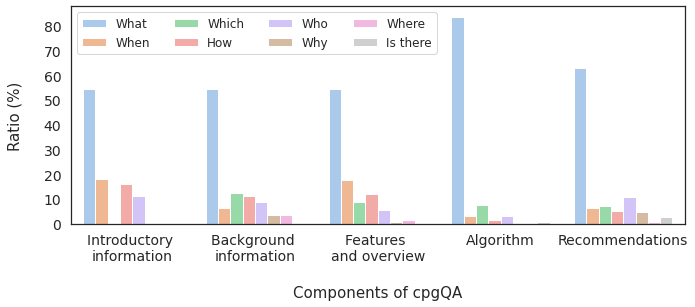

In [583]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

plt.subplots(figsize=(11, 4))
g = sns.barplot(x='Components', y='Ratio (%)',
                hue='Question Types',
                palette = 'pastel',
                data=df,
                order = ['Introduction',
                         'Background',
                         'Specifications',
                         'Algorithm',
                         'Recommendations',
                        ]
               ) 

g.set_xticks(range(5))
g.set_xticklabels(['Introductory \ninformation',
                    'Background \ninformation',
                    'Features \nand overview',
                    'Algorithm',
                    'Recommendations'
                  ], size=14)
plt.yticks(size=14)
plt.xlabel('\nComponents of cpgQA', size=15)
plt.ylabel('Ratio (%)\n', size=15)
plt.legend(loc='best', fontsize=12, ncol = 4)
plt.show()


In [584]:
# Introductory information
# Background information
# Features and overview
# Algorithm
# Recommendations

In [585]:
df_final

,Question,Question Type,QID,Answer,Title,EM,F1
0,What is recommended when considering initiatin...,What,0,assessing suicide risk,Recommendations,1,1.000000
1,Which strategies may be helpful for those at h...,Which,1,"checking the PDMP, performing a UDT, placemen...",Recommendations,1,1.000000
2,What can be a continuous predictor of adverse ...,What,2,age,Recommendations,1,1.000000
3,Who may disagree with the recommendation to us...,Who,3,Some patients with SUD,Recommendations,1,1.000000
4,What is a good predictor of overdose death?,What,4,Prescribed opioid dosage,Recommendations,1,1.000000
...,...,...,...,...,...,...,...
1092,In there any study on the outcome of populatio...,Is there,183,In a prospective cohort study (not included in...,Recommendations,0,0.125000
1093,Define chronic pain according to the VA/DoD CPG.,What,45,pain lasting three months or more. It is often...,Background,0,0.444444
1094,Define pain according to the VA/DoD CPG.,What,66,an unpleasant sensory and emotional experience...,Background,0,0.964706
1095,Mention some differences in the methodology us...,What,3,"Along with a clinical evidence review, during ...",Background,0,0.299320


In [586]:
df_em_f1 = df_final.groupby(['Question Type', 'Title']).mean()

In [587]:
df_em_f1

EM        F1
Question Type Title                              
How           Algorithm        0.500000  0.900000
              Background       0.884615  0.990129
              Introduction     0.714286  0.844156
              Recommendations  0.666667  0.885003
              Specifications   0.735294  0.926933
Is there      Algorithm        1.000000  1.000000
              Recommendations  0.636364  0.852769
What          Algorithm        0.824074  0.890194
              Background       0.771654  0.914606
              Introduction     0.833333  0.951691
              Recommendations  0.802326  0.932127
              Specifications   0.769737  0.884189
When          Algorithm        0.500000  0.760870
              Background       0.733333  0.909904
              Introduction     0.625000  0.783333
              Recommendations  0.769231  0.859615
              Specifications   0.877551  0.962399
Where         Background       0.750000  0.925926
              Recommendations  1.000000  1.000000
              Specifications   0.250000  0.250000
Which         Algorithm        0.900000  0.923077
              Background       0.724138  0.921642
              Recommendations  0.551724  0.828940
              Specifications   0.875000  0.962253
Who           Algorithm        1.000000  1.000000
              Background       0.850000  0.923367
              Introduction     0.800000  0.844444
              Recommendations  0.866667  0.976319
              Specifications   1.000000  1.000000
Why           Background       0.750000  0.944444
              Recommendations  0.684211  0.976230
              Specifications   1.000000  1.000000

In [588]:
qt_sec = list(df_em_f1.index)
em = df_em_f1['EM'].values.tolist()
f1 = df_em_f1['F1'].values.tolist()

In [589]:
qt  = [x[0] for x in qt_sec]
sec = [x[1] for x in qt_sec]

assert len(qt) == len(sec) == len(em)  == len(f1)

In [590]:
df_em_f1 = pd.DataFrame()
df_em_f1['Question Types'] = qt
df_em_f1['Components'] = sec
df_em_f1['EM'] = em
df_em_f1['F1'] = f1

df_em_f1

,Question Types,Components,EM,F1
0,How,Algorithm,0.500000,0.900000
1,How,Background,0.884615,0.990129
2,How,Introduction,0.714286,0.844156
3,How,Recommendations,0.666667,0.885003
4,How,Specifications,0.735294,0.926933
5,Is there,Algorithm,1.000000,1.000000
6,Is there,Recommendations,0.636364,0.852769
7,What,Algorithm,0.824074,0.890194
8,What,Background,0.771654,0.914606
9,What,Introduction,0.833333,0.951691


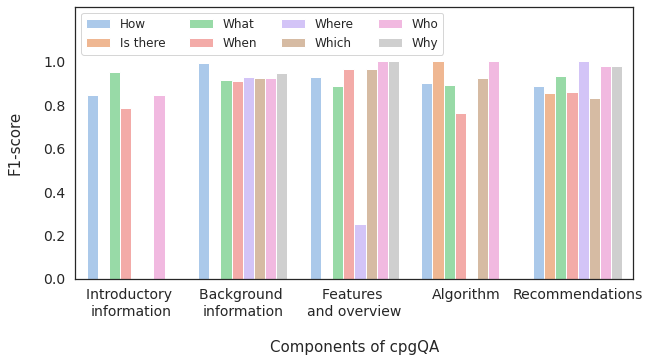

In [598]:
plt.subplots(figsize=(10, 5))
g = sns.barplot(x='Components', y='F1',
                hue='Question Types',
                palette = 'pastel',
#                 alpha=0.6,
                data=df_em_f1,
                order = ['Introduction',
                         'Background',
                         'Specifications',
                         'Algorithm',
                         'Recommendations',
                        ],
               ) 

g.set_xticks(range(5))
g.set_xticklabels(['Introductory \ninformation',
                    'Background \ninformation',
                    'Features \nand overview',
                    'Algorithm',
                    'Recommendations'
                  ], size=14)
plt.yticks(size=14)
plt.xlabel('\nComponents of cpgQA', size=15)
plt.ylabel('F1-score\n', size=15)
plt.legend(loc='upper left', fontsize=12,
           ncol=4, 
#           bbox_to_anchor=(1, 1.04),
          )
plt.ylim(0, 1.25)
plt.yticks(np.arange(0, 1.2, .2))
plt.show()


In [615]:
df = df_final.groupby(['Question Type']).mean()

qt = list(df.index)
em = df['EM'].values.tolist()
metric = ['Exact Match']*len(qt)
f1 = df['F1'].values.tolist()

metric.extend(['F1-Score']*len(qt))
qt.extend(qt)
em.extend(f1)

df = pd.DataFrame()
df['Question Types'] = qt
df['Score'] = em
df['Metric'] = metric

df

,Question Types,Score,Metric
0,How,0.755556,Exact Match
1,Is there,0.666667,Exact Match
2,What,0.793722,Exact Match
3,When,0.794118,Exact Match
4,Where,0.642857,Exact Match
5,Which,0.728261,Exact Match
6,Who,0.887640,Exact Match
7,Why,0.724138,Exact Match
8,How,0.928369,F1-Score
9,Is there,0.865038,F1-Score


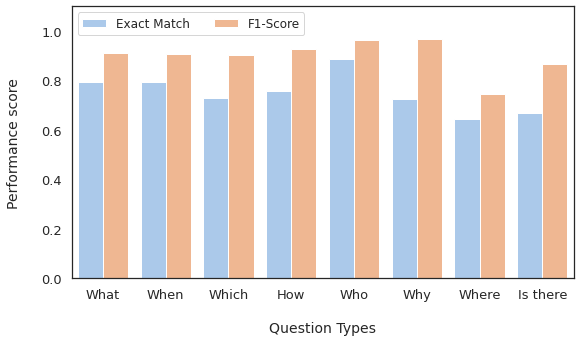

In [650]:
plt.subplots(figsize=(9, 5))
color = sns.color_palette('pastel')
g = sns.barplot(x='Question Types', y='Score',
                hue='Metric',
                palette = color[0:2],
                data=df,
                order = ['What', 'When', 'Which',
                         'How', 'Who', 'Why',
                         'Where', 'Is there', 
                        ]
               ) 

plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('\nQuestion Types', size=14)
plt.ylabel('Performance score\n', size=14)
plt.legend(loc='upper left', fontsize=12,
           ncol=4, 
#           bbox_to_anchor=(1, 1.04),
          )
plt.ylim(0, 1.1)
plt.show()


In [1088]:
df = df_final.groupby(['Title']).mean()

comp = list(df.index)
em = df['EM'].values.tolist()
metric = ['Exact Match']*len(comp)
f1 = df['F1'].values.tolist()
print(np.mean(f1))
print(np.mean(em))

metric.extend(['F1-Score']*len(comp))
comp.extend(comp)
em.extend(f1)

df = pd.DataFrame()
df['Components'] = comp
df['Score'] = em
df['Metric'] = metric

df

0.9082724347440079
0.7898542413298829


,Components,Score,Metric
0,Algorithm,0.821705,Exact Match
1,Background,0.781116,Exact Match
2,Introduction,0.772727,Exact Match
3,Recommendations,0.773723,Exact Match
4,Specifications,0.800000,Exact Match
5,Algorithm,0.893141,F1-Score
6,Background,0.925772,F1-Score
7,Introduction,0.891786,F1-Score
8,Recommendations,0.922935,F1-Score
9,Specifications,0.907729,F1-Score


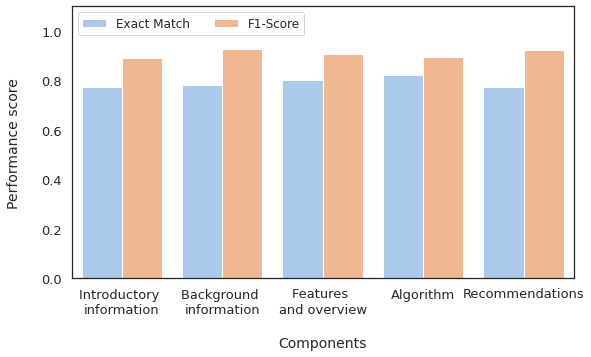

In [654]:
plt.subplots(figsize=(9, 5))
g = sns.barplot(x='Components', y='Score',
                hue='Metric',
                palette = 'pastel',
                data=df,
                order = ['Introduction',
                         'Background',
                         'Specifications',
                         'Algorithm',
                         'Recommendations',
                        ]
               ) 

g.set_xticks(range(5))
g.set_xticklabels(['Introductory \ninformation',
                    'Background \ninformation',
                    'Features \nand overview',
                    'Algorithm',
                    'Recommendations'
                  ], size=13)
plt.yticks(size=13)
plt.xlabel('\nComponents', size=14)
plt.ylabel('Performance score\n', size=14)
plt.legend(loc='upper left', fontsize=12,
           ncol=4, 
#           bbox_to_anchor=(1, 1.04),
          )
plt.ylim(0, 1.1)
plt.show()


# Length

In [516]:
# df_final.to_csv('results.csv', index=False)

In [655]:
# import spacy
# nlp = spacy.load("en_core_web_md")
# def count_words(text):
#   tokens = [word.text for word in nlp(text)]
#   return tokens

from transformers import AutoTokenizer
m = AutoTokenizer.from_pretrained('michiyasunaga/BioLinkBERT-base')


def count_words(text):
  tokens = m.tokenize(text)
  return tokens

In [744]:
df_final

,Question,Question Type,QID,Answer,Title,EM,F1,Question Words,Answer Words,Question Length,Answer Length,Count
0,What is recommended when considering initiatin...,What,0,assessing suicide risk,Recommendations,1,1.000000,"[what, is, recommended, when, considering, ini...","[assessing, suicide, risk]",14,3,1
1,Which strategies may be helpful for those at h...,Which,1,"checking the PDMP, performing a UDT, placemen...",Recommendations,1,1.000000,"[which, strategies, may, be, helpful, for, tho...","[checking, the, pd, ##mp, ,, performing, a, ud...",18,25,1
2,What can be a continuous predictor of adverse ...,What,2,age,Recommendations,1,1.000000,"[what, can, be, a, continuous, predictor, of, ...",[age],10,1,1
3,Who may disagree with the recommendation to us...,Who,3,Some patients with SUD,Recommendations,1,1.000000,"[who, may, disagre, ##e, with, the, recommenda...","[some, patients, with, sud]",23,4,1
4,What is a good predictor of overdose death?,What,4,Prescribed opioid dosage,Recommendations,1,1.000000,"[what, is, a, good, predictor, of, overdose, d...","[prescribed, opioid, dosage]",9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,In there any study on the outcome of populatio...,Is there,183,In a prospective cohort study (not included in...,Recommendations,0,0.125000,"[in, there, any, study, on, the, outcome, of, ...","[in, a, prospective, cohort, study, (, not, in...",30,60,1
1093,Define chronic pain according to the VA/DoD CPG.,What,45,pain lasting three months or more. It is often...,Background,0,0.444444,"[define, chronic, pain, according, to, the, va...","[pain, lasting, three, months, or, more, ., it...",11,26,1
1094,Define pain according to the VA/DoD CPG.,What,66,an unpleasant sensory and emotional experience...,Background,0,0.964706,"[define, pain, according, to, the, va, /, dod,...","[an, unpleasant, sensory, and, emotional, expe...",10,57,1
1095,Mention some differences in the methodology us...,What,3,"Along with a clinical evidence review, during ...",Background,0,0.299320,"[mention, some, differences, in, the, methodol...","[along, with, a, clinical, evidence, review, ,...",22,194,1


In [745]:
df_final['Question Words'] = df_final['Question'].apply(count_words)
df_final['Answer Words'] = df_final['Answer'].apply(count_words)

df_final['Question Length'] = df_final['Question Words'].apply(len)
df_final['Answer Length'] = df_final['Answer Words'].apply(len)


In [746]:
df_final['Count']=[1]*df_final.shape[0]

In [747]:
df_final['Count'].sum()

1097

In [748]:
a = df_final['Answer Length'].values
b = df_final['Question Length'].values

In [1120]:
# stat = df_final['Answer Length'].describe()
# bins = [stat['25%'],
#         stat['50%'],
#         stat['75%'],
#         stat['max']]


bins = [0]+[int(np.percentile(a, x)) for x in list(range(0, 105, 15))+[100]]
print(bins.pop(1))
df_final.groupby(pd.cut(df_final['Answer Length'],bins=bins))['Count'].sum()#.values.sum()

1


Answer Length
(0, 3]       185
(3, 5]       164
(5, 8]       173
(8, 12]      156
(12, 18]     150
(18, 31]     164
(31, 194]    105
Name: Count, dtype: int64

In [1121]:
bins, int(np.percentile(a, 15))

([0, 3, 5, 8, 12, 18, 31, 194], 3)

In [1122]:
def plot_binned_score(df, column_name, bins, xlab):
    col   = ['EM', 'F1', 'Count', column_name]
    color = sns.color_palette('pastel')
#     bins = list(np.arange(df[column_name].min(), df[column_name].max(), n)) #+ [np.inf]
 
    df_binned     = df.groupby(pd.cut(df[column_name],bins=bins))[col].mean()
    df_binned_sum = df.groupby(pd.cut(df[column_name],bins=bins))[col].sum()
    
    assert (df_binned.index == df_binned_sum.index).all()

    assert df_binned.shape == df_binned_sum.shape

    df_binned.dropna(inplace=True)
    df_binned_sum.dropna(inplace=True)
    df_binned_sum = df_binned_sum[df_binned_sum['Count']!=0]
        
    assert df_binned.shape == df_binned_sum.shape

    fig, ax = plt.subplots(figsize=(10,8))
    
    plt.plot(range(df_binned.shape[0]),
#                df_binned[column_name].values,
                 df_binned['EM'].values,
                 'o-',
                 color = color[0],
                 label = 'EM score')

    plt.plot(range(df_binned.shape[0]),
#                  df_binned[column_name].values,
                 df_binned['F1'].values,
                 'o-',
                 color = color[1],
                 label = 'F1 score')
    
    plt.legend(loc="upper right", prop={'size': 14})
    
    plt.xticks(range(df_binned.shape[0]),
               list(df_binned.index),
               fontsize=13,
#                rotation = 0
              )
    
    plt.yticks(fontsize=13,
#                rotation = 0
              )

    plt.ylim(0.58,1)
    plt.xlabel(f'\nBins of {xlab}', fontsize=15)
    plt.ylabel('Performance score\n', fontsize=15)
    ax.tick_params(direction='out',
                   bottom=True, left=True,
                   length=5, width=1)
    
    
    
    a = plt.axes([.2, .2, .4, .2], facecolor='white')
    plt.bar(range(df_binned.shape[0]),
#             df_binned[column_name].values,
            df_binned_sum['Count'].values, 
#             color = 'b',
            alpha = .4,
            width = 1,
#             label = 'Sample Count'
           )
    
    plt.xticks(range(df_binned.shape[0]),
               list(df_binned.index),
               fontsize=8,
               rotation = 0
              )
    
    plt.yticks(fontsize=8)
    
#     plt.legend(loc="best",prop={'size': 10})

    plt.xlabel(f'Bins', fontsize=10)
    plt.ylabel('Sample count', fontsize=10)
    
#     plt.xticks(df_binned_sum[column_name].values, list(df_binned_sum.index), rotation = 60)
#     plt.yticks(rotation = 0)

#     ax.tick_params(direction='out', length=20, width=2, colors='k',
#                grid_color='k', grid_alpha=1)

    a.tick_params(direction='out',
                  bottom=True, left=True,
                  length=3, width=1)

    plt.show()
    
    print(df_binned_sum['Count'].values)
    
    return df_binned
  


In [1123]:
bins

[0, 3, 5, 8, 12, 18, 31, 194]

In [1124]:
# l = df_final.groupby(pd.cut(df_final['Answer Length'],bins=bins))['EM'].mean().values

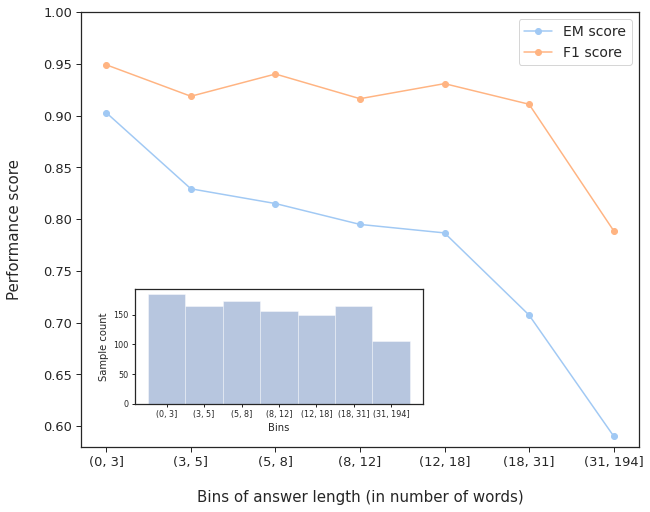

[185 164 173 156 150 164 105]


,EM,F1,Count,Answer Length
Answer Length,,,,
"(0, 3]",0.902703,0.949000,1.0,2.135135
"(3, 5]",0.829268,0.918636,1.0,4.524390
"(5, 8]",0.815029,0.940123,1.0,6.890173
"(8, 12]",0.794872,0.916287,1.0,10.493590
"(12, 18]",0.786667,0.930833,1.0,15.153333
"(18, 31]",0.707317,0.910929,1.0,24.420732
"(31, 194]",0.590476,0.788842,1.0,53.400000


In [1125]:
plot_binned_score(df_final, 'Answer Length', bins, "answer length (in number of words)")

<AxesSubplot:>

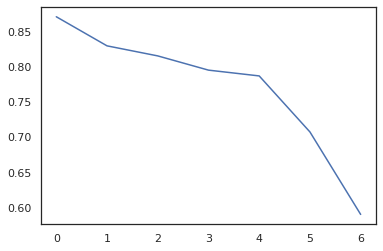

In [1039]:
sns.lineplot(x=range(len(l)), y=l)

In [741]:
df_final['Question Length'].describe()

count    1097.000000
mean       15.082954
std         7.823291
min         4.000000
25%        10.000000
50%        13.000000
75%        18.000000
max        63.000000
Name: Question Length, dtype: float64

In [532]:
df_final['Answer Length'].describe()

count    1097.000000
mean       14.449407
std        16.931632
min         1.000000
25%         5.000000
50%         9.000000
75%        18.000000
max       194.000000
Name: Answer Length, dtype: float64

In [533]:
df_final[df_final['Answer Length']>30]

,Question,Question Type,QID,Answer,Title,EM,F1,Question Words,Answer Words,Question Length,Answer Length
8,What combinations of drugs are dangerous?,What,8,i)Opioids with benzodiazepines (compared to pa...,Background,0,0.060606,"[what, combinations, of, drugs, are, dangerous...","[i, ), opioids, with, benzodiazepines, (, comp...",7,178
10,What may patients decline?,What,10,"offered treatments (e.g., OT) and may also dec...",Recommendations,0,0.296296,"[what, may, patients, decline, ?]","[offered, treatments, (, e, ., g, ., ,, ot, ),...",5,38
11,Who are at an increased risks of acute OT exte...,Who,11,"patients with mood disorders, those who refill...",Recommendations,0,0.296296,"[who, are, at, an, increased, risks, of, acute...","[patients, with, mood, disorders, ,, those, wh...",13,31
12,What does increase the risk of acute post-oper...,What,12,"a history of depression, SUD, catastrophizing...",Recommendations,0,0.090909,"[what, does, increase, the, risk, of, acute, p...","[a, history, of, depression, ,, sud, ,, catast...",15,31
13,Why is future research needed to optimize care...,Why,13,Given the increasing use of cannabis among pat...,Recommendations,0,0.800000,"[why, is, future, research, needed, to, optimi...","[given, the, increasing, use, of, cannabis, am...",19,35
...,...,...,...,...,...,...,...,...,...,...,...
1050,For which patients the VA/DoD Suicide CPG reco...,Which,25,patients considered to be at intermediate or h...,Recommendations,0,0.510638,"[for, which, patients, the, va, /, dod, suicid...","[patients, considered, to, be, at, intermediat...",17,42
1064,On which basis the frequency of follow-ups wit...,Which,301,"patient risk factors (e.g., 1-4 weeks with any...",Algorithm,0,0.230769,"[on, which, basis, the, frequency, of, follow,...","[patient, risk, factors, (, e, ., g, ., ,, 1, ...",18,32
1092,In there any study on the outcome of populatio...,Is there,183,In a prospective cohort study (not included in...,Recommendations,0,0.074074,"[in, there, any, study, on, the, outcome, of, ...","[in, a, prospective, cohort, study, (, not, in...",30,60
1094,Define pain according to the VA/DoD CPG.,What,66,an unpleasant sensory and emotional experience...,Background,0,0.436364,"[define, pain, according, to, the, va, /, dod,...","[an, unpleasant, sensory, and, emotional, expe...",10,57


In [535]:
117/1097

0.10665451230628988